In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
import sympy as sym

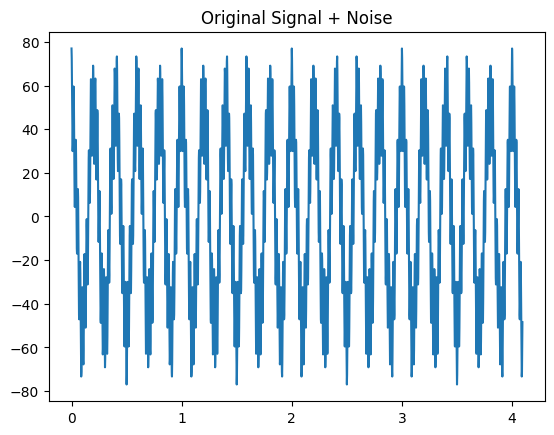

In [36]:
Np = 2048
fs = 500
Tf = Np/fs
dt = 1/fs
t = np.arange(0,Tf,dt)
g=lambda t: 51*np.cos(2*np.pi*5*t) + 5*np.cos(2*np.pi*17*t) + 21*np.cos(2*np.pi*51*t)
random_noise = [10*x for x in np.random.normal(0, 1, Np)]
g_matrix = g(t) + random_noise
plt.plot(t,g(t))
plt.title('Original Signal + Noise')
plt.savefig('HW2_2time.png')


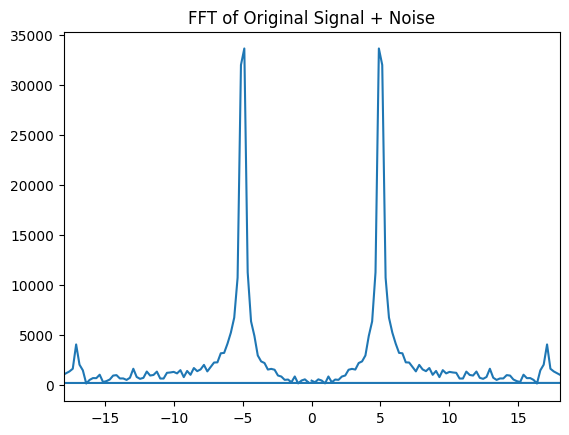

In [37]:
Gs = fft((g_matrix),Np)
f = fftfreq(Np,dt)
plt.plot(f,abs(Gs), linestyle='-')
plt.title('FFT of Original Signal + Noise')
plt.savefig('HW2_2freq.png')
plt.xlim(-18, 18)
plt.show()

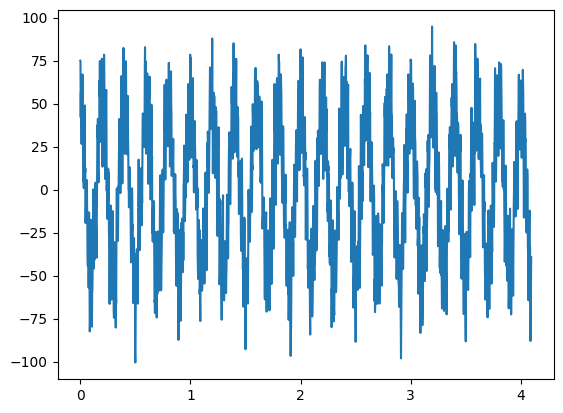

In [38]:
ms = ifft(Gs)
plt.plot(t,ms)

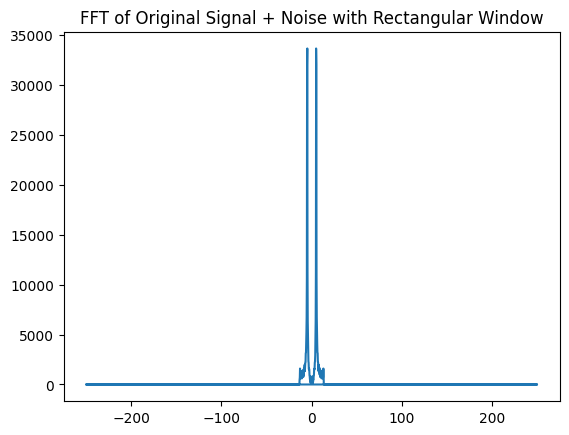

(array([   0,    1,    3,    5,    8,   10,   12,   14,   15,   17,   18,
         19,   20,   26,   27,   28,   29,   30,   32,   33,   35,   36,
         38,   42,   44,   45,   46,   50,   52,   53, 1993, 1995, 1996,
       1998, 2002, 2003, 2004, 2006, 2010, 2012, 2013, 2015, 2016, 2018,
       2019, 2020, 2021, 2022, 2028, 2029, 2030, 2031, 2033, 2034, 2036,
       2038, 2040, 2043, 2045, 2047]),)


In [39]:
size_rectaingular_func = 55
start = len(Gs)//2 - size_rectaingular_func//2
end = len(Gs)//2 + size_rectaingular_func//2
Gm = Gs.copy()
w = np.ones(2048)
number_of_points = 55
w[number_of_points:-number_of_points] = 0
Gm = Gm*w
plt.plot(f, abs(Gm))
plt.title('FFT of Original Signal + Noise with Rectangular Window')
plt.savefig('HW2_2freq_55points.png')
plt.show()

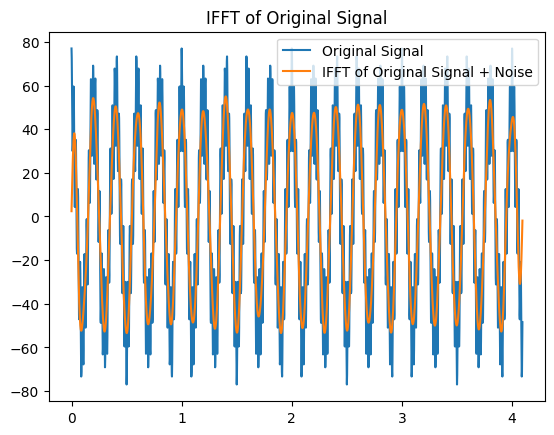

In [40]:
g_m = ifft(Gm)
plt.plot(t, g(t), label='Original Signal')
plt.plot(t, g_m, label='IFFT of Original Signal + Noise')
plt.legend()
plt.title('IFFT of Original Signal')
plt.savefig('HW2_2IFFT_55points.png')
plt.show()

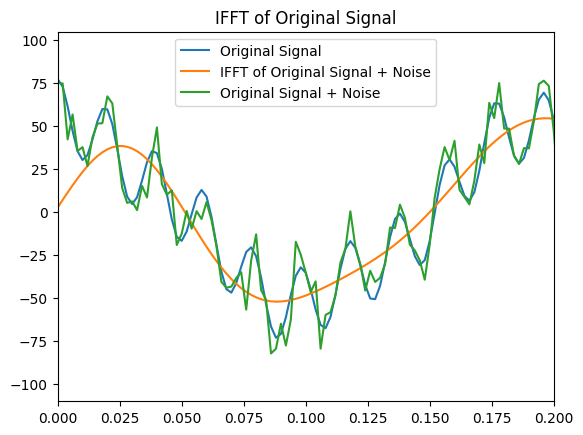

In [41]:
plt.plot(t, g(t), label='Original Signal')
plt.plot(t, g_m, label='IFFT of Original Signal + Noise')
plt.plot(t, g_matrix, label='Original Signal + Noise')
plt.legend()
plt.title('IFFT of Original Signal')
plt.xlim(0, 0.2)
plt.show()

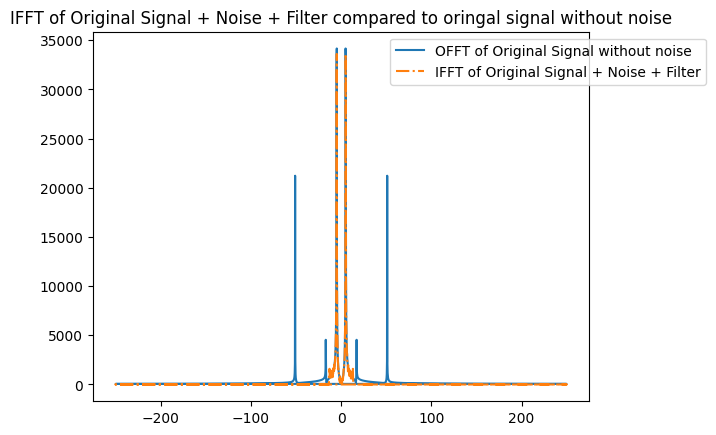

In [42]:
G = fft(g(t), Np)
plt.plot(f, abs(G), label='OFFT of Original Signal without noise')
plt.plot(f, abs(Gm), label='IFFT of Original Signal + Noise + Filter', linestyle='-.')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('IFFT of Original Signal + Noise + Filter compared to oringal signal without noise')
plt.savefig('HW2_2filter.png')
plt.show()
